# **Predicting Vehicles With pytorch**

## **Import Libraries**

In [35]:

import os
import torch
import numpy as np
from typing import List, TypeVar
import matplotlib.pyplot as plt
from torchvision import transforms
from torch.utils.data import DataLoader
from torch import functional as f
from torch import nn
from torch.utils.data import random_split
from torchvision.datasets import ImageFolder

In [13]:
# Set the seed for reproducibly
torch.manual_seed(42)
np.random.seed(42)

BATCH_SIZE = 8
EPOCH = 5

## **Load The Data**

In [14]:
try:
    import google.colab
    if not os.path.exists("vehicles"):
        os.system('git clone "https://github.com/denis-spe/vehicles"')

    # Directory of dataset
    data_dir = "vehicles/vehicles"
except:
    # Directory of dataset
    data_dir = 'vehicles/vehicles'

In [15]:
if torch.cuda.is_available():
    device = "cuda"
else:
    device = "cpu"

In [16]:
# Create a ImageFolder object: dataset
dataset = ImageFolder(
    data_dir,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Resize((300, 300))
    ])
    )
dataset

Dataset ImageFolder
    Number of datapoints: 196
    Root location: vehicles/vehicles
    StandardTransform
Transform: Compose(
               ToTensor()
               Resize(size=(300, 300), interpolation=bilinear, max_size=None, antialias=warn)
           )

In [17]:
# classes
classes = dataset.classes
classes

['bus', 'car', 'motorbike', 'truck']

In [18]:
# Set the seed for reproducibly
generator = torch.Generator(device=device).manual_seed(42)

# Number of images
n_imgs = len(dataset)

# Train and validation sample size
train_size = int(n_imgs * 0.75)
val_size = n_imgs - train_size

# Split the data into train and validation data
train_dataset, val_dataset = random_split(dataset, lengths=[train_size, val_size], generator=generator)

print("Number of train samples: %s\nNumber of val samples: %s" % (len(train_dataset), len(val_dataset)))

Number of train samples: 147
Number of val samples: 49


In [19]:
# Construct a DataLoader objects
train_dataloader = DataLoader(
    train_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True
    )
val_dataloader = DataLoader(
    val_dataset,
    batch_size=BATCH_SIZE,
    )

In [20]:

# Get one of the image from the train data
img, label = next(iter(train_dataloader.dataset))
img.shape

torch.Size([3, 300, 300])

In [60]:
label

2

## **Visualise The Images**

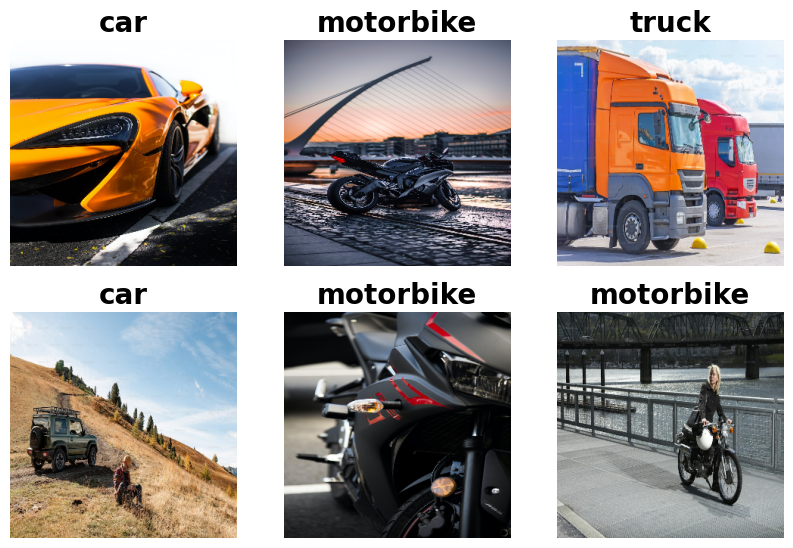

In [27]:
NCOL = 3
NROW = 3

# Create a figure
fig = plt.figure(figsize=(10, 10))

for i in range(1, NCOL + NROW + 1):
    # Initialize the image and label
    img, label = train_dataloader.dataset[i]

    # Add a subplot
    fig.add_subplot(NCOL, NROW, i)

    # plot the image
    plt.imshow(img.permute(1, 2, 0))
    plt.axis('off')
    plt.title(classes[label], weight="bold", size=20)

## **Model Building**

In [73]:
Layer = TypeVar('Layer')
Optimizer = TypeVar('Optimizer')
Loss = TypeVar('Loss')
Device = TypeVar('Device')

class Model(nn.Module):
    def __init__(self, layers: List[Layer]) -> None:
        super(Model, self).__init__()
        self.stacked_layers = nn.Sequential(*layers)
        self.optimizer: Optimizer = None
        self.loss: Loss = None
        self.device: Device = None

    def forward(self, x):
       return self.stacked_layers(x)

    def compile(self, optimizer: Optimizer, loss: Loss) -> None:
       self.optimizer = optimizer
       self.loss = loss

    def training_data(self, dataloader: DataLoader):
       # Indicate model to training
       self.train()

       if not self.optimizer or not self.loss:
           raise AttributeError('Compile the model with `model.compile` before fitting the model')

       # Loop over the dataset
       for image, label in dataloader.dataset:
           # Make predicts
           pred = self(image)

           prin
           break

In [74]:
model = Model([
           nn.Flatten(),
           nn.Linear(
             300 * 300,
             out_features=1029),
           nn.Linear(
             1029,
             out_features=4)
        ])

model.compile(
     optimizer=torch.optim.Adam(
        model.parameters()
        ),
     loss=nn.CrossEntropyLoss()
   )

In [75]:
model.training_data(train_dataloader)

tensor([[ 0.1309,  0.0493,  0.0744, -0.3414],
        [ 0.1321,  0.0563,  0.0791, -0.3569],
        [ 0.1494,  0.0911,  0.1005, -0.3703]], grad_fn=<AddmmBackward0>)
